In [7]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [3]:
folder_path = "../../data/39_Training_Dataset/train_data/"
# folder_path = "../data/39_Test_Dataset/test_data/"
file_name = "1.txt"
data_path = folder_path + file_name
column_names = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
time_data = pd.read_csv(data_path, sep=' ', names=column_names)
time_data.head()

,Ax,Ay,Az,Gx,Gy,Gz
0,0,0,0,0,0,0
1,1923,313,12,-906,321,-994
2,1929,297,-20,-833,260,-1005
3,1907,262,-26,-850,33,-1029
4,1900,247,-22,-1134,-142,-921


In [5]:
time_data.shape

(1651, 6)

In [6]:
len(time_data)

1651

In [9]:
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(time_data)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=column_names)

print("\nScaled Data (0 to 1):")
print(scaled_df.head())

print("\nMaximum and Minimum values for each column:")
for col in scaled_df.columns:
    max_val = scaled_df[col].max()
    min_val = scaled_df[col].min()
    print(f"{col}: Max = {max_val:.4f}, Min = {min_val:.4f}")


Scaled Data (0 to 1):
         Ax        Ay        Az        Gx        Gy        Gz
0  0.113036  0.779376  0.397502  0.500008  0.459701  0.500008
1  0.333716  0.815399  0.398384  0.486183  0.464994  0.484840
2  0.334404  0.813557  0.396032  0.487297  0.463988  0.484672
3  0.331880  0.809529  0.395591  0.487037  0.460245  0.484306
4  0.331076  0.807803  0.395885  0.482704  0.457359  0.485954

Maximum and Minimum values for each column:
Ax: Max = 1.0000, Min = 0.0000
Ay: Max = 1.0000, Min = 0.0000
Az: Max = 1.0000, Min = 0.0000
Gx: Max = 1.0000, Min = 0.0000
Gy: Max = 1.0000, Min = 0.0000
Gz: Max = 1.0000, Min = 0.0000


## Get Maxium Sequence Length for Padding

Maximum sequence length found (train): 4696
File with the maximum sequence length: 384.txt


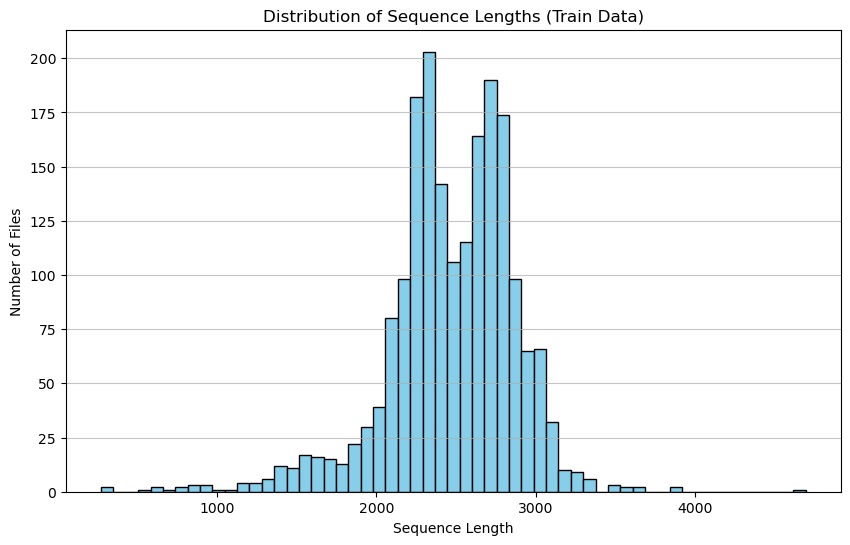

In [20]:
# Define the directory containing your text files
folder_path = "../../data/39_Training_Dataset/train_data/" # Adjust if necessary
file_pattern = os.path.join(folder_path, "*.txt")
file_paths = glob.glob(file_pattern)

if not file_paths:
    print(f"No .txt files found in the directory: {folder_path}")
else:
    max_sequence_length = 0
    file_with_max_length = None
    column_names = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz'] # As per your image
    all_sequence_lengths = [] # List to store all sequence lengths for plotting

    for file_path in file_paths:
        # Removed try-except block as requested
        time_data = pd.read_csv(file_path, sep=' ', names=column_names) # Assuming space separated
        current_length = len(time_data)
        all_sequence_lengths.append(current_length) # Store current length

        # Update maximum length if current file is longer
        if current_length > max_sequence_length:
            max_sequence_length = current_length
            file_with_max_length = os.path.basename(file_path)

    if file_with_max_length:
        print(f"Maximum sequence length found (train): {max_sequence_length}")
        print(f"File with the maximum sequence length: {file_with_max_length}")

        # Plotting the distribution of sequence lengths
        if all_sequence_lengths:
            plt.figure(figsize=(10, 6))
            plt.hist(all_sequence_lengths, bins='auto', color='skyblue', edgecolor='black') # 'auto' tries to find optimal number of bins
            plt.title('Distribution of Sequence Lengths (Train Data)')
            plt.xlabel('Sequence Length')
            plt.ylabel('Number of Files')
            plt.grid(axis='y', alpha=0.75)
            plt.show()
        else:
            print("No sequence lengths recorded to plot.")

    else:
        print("\nCould not determine maximum sequence length (perhaps all files were empty).")

## Removed 3030.txt as outlier

Maximum sequence length found (train): 4588
File with the maximum sequence length: 2851.txt


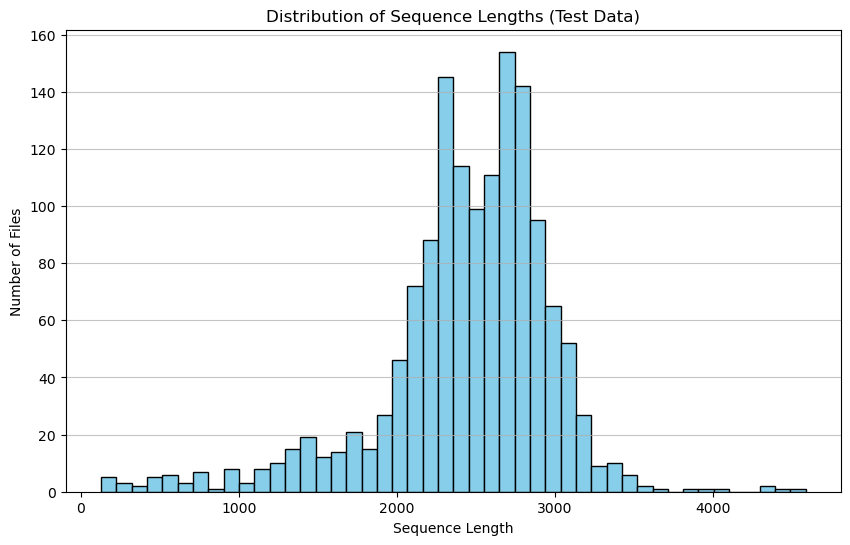

In [23]:
# Define the directory containing your text files
folder_path = "../../data/39_Test_Dataset/test_data/"
file_pattern = os.path.join(folder_path, "*.txt")
file_paths = glob.glob(file_pattern)

if not file_paths:
    print(f"No .txt files found in the directory: {folder_path}")
else:
    max_sequence_length = 0
    file_with_max_length = None
    column_names = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz'] # As per your image
    all_sequence_lengths = [] # List to store all sequence lengths for plotting

    for file_path in file_paths:
        # Removed try-except block as requested
        time_data = pd.read_csv(file_path, sep=' ', names=column_names) # Assuming space separated
        current_length = len(time_data)
        all_sequence_lengths.append(current_length) # Store current length

        # Update maximum length if current file is longer
        if current_length > max_sequence_length:
            max_sequence_length = current_length
            file_with_max_length = os.path.basename(file_path)

    if file_with_max_length:
        print(f"Maximum sequence length found (train): {max_sequence_length}")
        print(f"File with the maximum sequence length: {file_with_max_length}")

        # Plotting the distribution of sequence lengths
        if all_sequence_lengths:
            plt.figure(figsize=(10, 6))
            plt.hist(all_sequence_lengths, bins='auto', color='skyblue', edgecolor='black') # 'auto' tries to find optimal number of bins
            plt.title('Distribution of Sequence Lengths (Test Data)')
            plt.xlabel('Sequence Length')
            plt.ylabel('Number of Files')
            plt.grid(axis='y', alpha=0.75)
            plt.show()
        else:
            print("No sequence lengths recorded to plot.")

    else:
        print("\nCould not determine maximum sequence length (perhaps all files were empty).")